In [1]:
pwd

'/Users/ldliao/Research/Projects/sewageCOVID'

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
os.chdir('/Users/ldliao/Research/Projects/sewageCOVID/data/')

In [2]:
real_data = pd.read_csv('/Users/ldliao/Research/Projects/sewageCOVID/data/variability_study_averaged_data.csv')
real_data.drop('Unnamed: 0', axis=1, inplace=True)

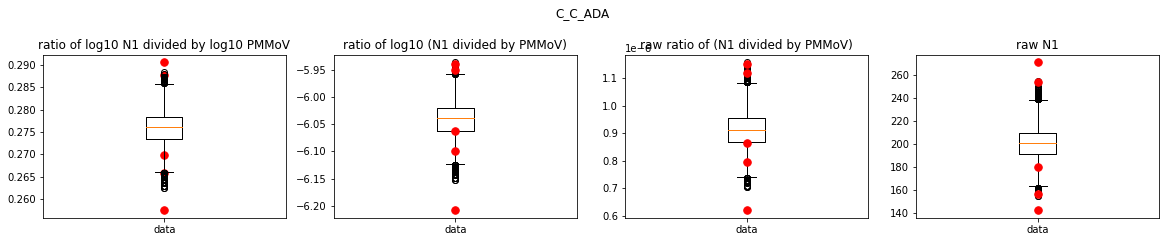

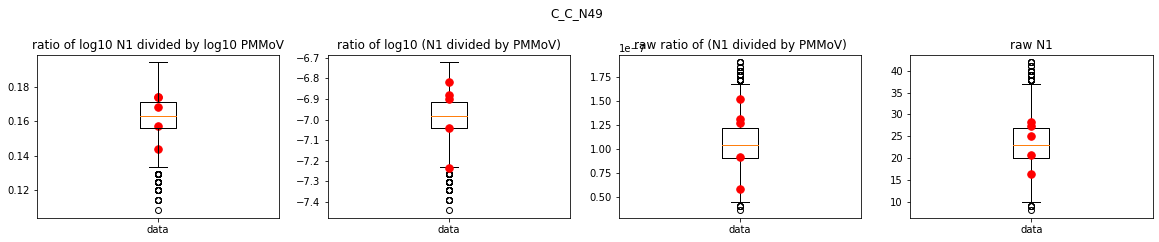

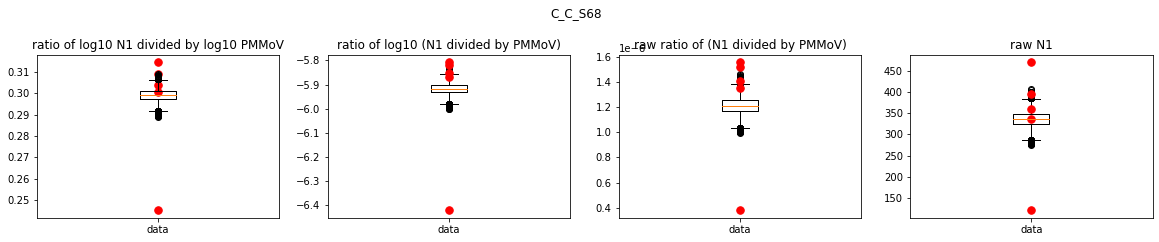

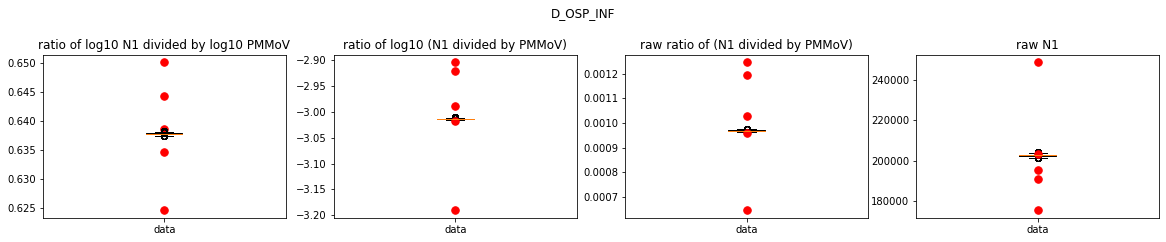

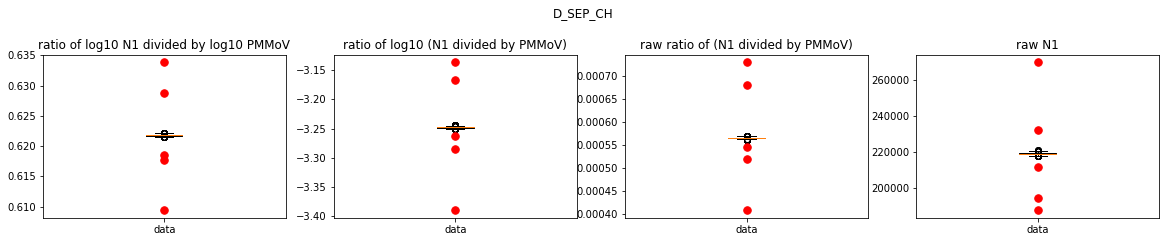

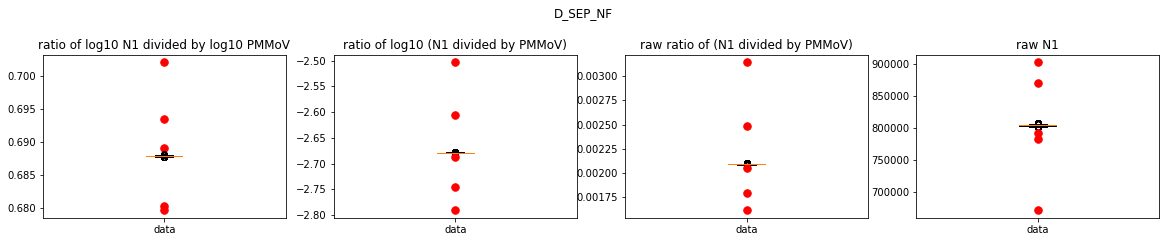

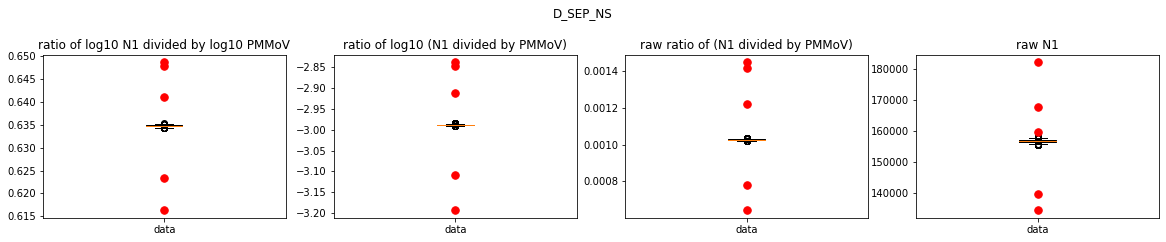

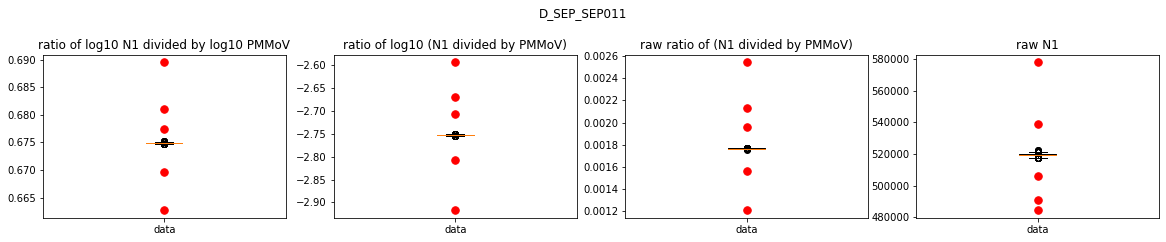

In [155]:
for i,dat in real_data.groupby(['sample_code']):
    
    # poisson simulation for n1
    np.random.seed(0)
    n1_lam = np.mean(dat[dat['Target'] == 'N1']['gc_per_L'])
    n1_sim = np.random.poisson(n1_lam, 10000)
    n1_log_sim = np.log10(n1_sim)

    # poisson simulation for PMMoV
    PMMoV_lam = np.mean(dat[dat['Target'] == 'PMMoV']['gc_per_L'])
    PMMoV_sim = np.random.poisson(PMMoV_lam, 10000)
    PMMoV_log_sim = np.log10(PMMoV_sim)

    # getting the ratio between N1 / PMMoV
    raw_ratio = [dat[dat['replicate']==rep] \
    [dat[dat['replicate']==rep] \
    ['Target'] == 'N1']['gc_per_L'].values[0] / \
    dat[dat['replicate']==rep] \
    [dat[dat['replicate']==rep] \
    ['Target'] == 'PMMoV']['gc_per_L'].values[0] \
     for rep in np.unique(dat.replicate)
    ]

    # getting the ratio between log N1 / log PMMoV
    log10_ratio = [np.log10(dat[dat['replicate']==rep] \
    [dat[dat['replicate']==rep] \
    ['Target'] == 'N1']['gc_per_L'].values[0]) / \
    np.log10(dat[dat['replicate']==rep] \
    [dat[dat['replicate']==rep] \
    ['Target'] == 'PMMoV']['gc_per_L'].values[0]) \
     for rep in np.unique(dat.replicate)
    ]
    
    # getting the raw N1
    just_N1 = dat[dat['Target'] == 'N1']['gc_per_L']

    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,3))
    #ax1.hist(n1_log_sim/PMMoV_log_sim)
    #ax2.hist(np.log10(n1_sim/PMMoV_sim))
    ax1.plot([1 for _ in log10_ratio], log10_ratio, 'r.', markersize=15)
    ax1.boxplot(n1_log_sim/PMMoV_log_sim)
    ax1.set_title('ratio of log10 N1 divided by log10 PMMoV')
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    labels[0] = 'data'
    ax1.set_xticklabels(labels)

    ax2.boxplot(np.log10(n1_sim/PMMoV_sim))
    ax2.plot([1 for _ in np.log10(raw_ratio)], np.log10(raw_ratio), 'r.', markersize=15)
    ax2.set_title('ratio of log10 (N1 divided by PMMoV)')
    ax2.set_xticklabels(labels)

    #f, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,5))

    ax3.boxplot(n1_sim/PMMoV_sim)
    ax3.plot([1 for _ in raw_ratio], raw_ratio, 'r.', markersize=15)
    ax3.set_title('raw ratio of (N1 divided by PMMoV)')
    ax3.set_xticklabels(labels)

    ax4.boxplot(n1_sim)
    ax4.plot([1 for _ in just_N1], just_N1, 'r.', markersize=15)
    ax4.set_title('raw N1')
    ax4.set_xticklabels(labels)

    plt.suptitle(i, y=1.1)

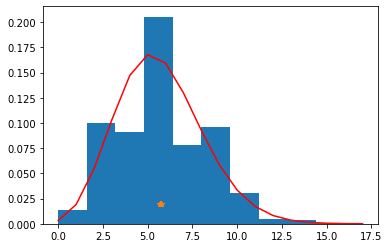

In [36]:
from scipy.special import factorial
lam = np.mean(np.log10(real_data[real_data['Target'] == 'PMMoV']['gc_per_L']))
n1_sim = np.random.poisson(np.mean(np.log10(dat[dat['Target'] == 'N1']['gc_per_L'])), 10000)

#plt.hist(np.log10(real_data[real_data['Target'] == 'PMMoV']['gc_per_L']), density=True)
plt.hist(n1_sim,density=True)
# plt.hist(np.random.poisson(lam, 10000))
plt.plot(np.log10(dat[dat['Target'] == 'N1']['gc_per_L']),[0.02 for x in range(5)],'*')
X = np.arange(0, 18, 1)
plt.plot(X,poisson.pmf(X,5.7), 'r-')

plt.show()